In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
import corner, emcee, tqdm
from tweezepy import AV, PSD, MLE
import os

In [35]:
folderPath1 = "c:\\Users\\maddr\\OneDrive\\Documents\\MTCode\\Magnetic-Tweezers\\Data\\October\\6\\1\\dataTSV"

fileList = glob.glob(folderPath1 + '/*.txt')

concatDF = pd.DataFrame(pd.read_table(fileList[0],names=['inf','zMotor', 'rotmotor', 
                                                         'xRefBead1', 'yRefBead1', 'zRefBead1', 
                                                         'xRefBead2', 'yRefBead2', 'zRefBead2',
                                                         'xExpBead1','yExpBead1','zExpBead1',
                                                         'xExpBead2','yExpBead2','zExpBead2' ]), columns=['inf','zMotor', 'rotmotor',
                                                                                                           'xRefBead1', 'yRefBead1', 'zRefBead1',
                                                                                                           'xRefBead2', 'yRefBead2', 'zRefBead2', 
                                                                                                           'xExpBead1','yExpBead1','zExpBead1',
                                                                                                           'xExpBead2','yExpBead2','zExpBead2'])

for i  in range(len(fileList)):
    data = pd.read_table(fileList[i],names=['inf','zMotor', 'rotmotor', 
                                            'xRefBead1', 'yRefBead1', 'zRefBead1',
                                            'xRefBead2', 'yRefBead2', 'zRefBead2',
                                            'xExpBead1','yExpBead1','zExpBead1',
                                            'xExpBead2','yExpBead2','zExpBead2' ])
    df = pd.DataFrame(data, columns=['inf','zMotor', 'rotmotor', 
                                     'xRefBead1', 'yRefBead1', 'zRefBead1',
                                     'xRefBead2', 'yRefBead2', 'zRefBead2',
                                     'xExpBead1','yExpBead1','zExpBead1',
                                     'xExpBead2','yExpBead2','zExpBead2' ])
    concatDF = pd.concat([concatDF, df], ignore_index='inner')

In [36]:
xConv = 64.6
yConv = 64.7
zMotor = concatDF['zMotor']

xRefBead1 = concatDF['xRefBead1']*xConv
yRefBead1 = concatDF['yRefBead1']*yConv
zRefBead1 = concatDF['zRefBead1']*1000

xRefBead2 = concatDF['xRefBead2']*xConv
yRefBead2 = concatDF['yRefBead2']*yConv
zRefBead2 = concatDF['zRefBead2']*1000

xExpBead1 = concatDF['xExpBead1']*xConv
yExpBead1 = concatDF['yExpBead1']*yConv
zExpBead1 = concatDF['zExpBead1']*1000

xExpBead2 = concatDF['xExpBead2']*xConv
yExpBead2 = concatDF['yExpBead2']*yConv
zExpBead2 = concatDF['zExpBead2']*1000

timeVector = pd.Series(range(len(zExpBead1)))/400

## Good beads
beadX = xExpBead1 - xRefBead1
beadY = yExpBead1 - yRefBead1
beadZ = zExpBead1 - zRefBead1  # REF BEAD IS ACTUALLY THE EXP BEAD

lowForceStart = 40000
lowForceEnd = 60000

highForceStart = 5000
highForceEnd = 20000

medForceStart = 68500
medForceEnd = 83000

The high force x-variance is:  323.5073752823527
The high force y-variance is:  336.75953784019515
The high force z-variance is:  20.856188800191564
The low force x-variance is:  5259.359658453066
The low force y-variance is:  25486.16937494666
The low force z-variance is:  15603.977061552405


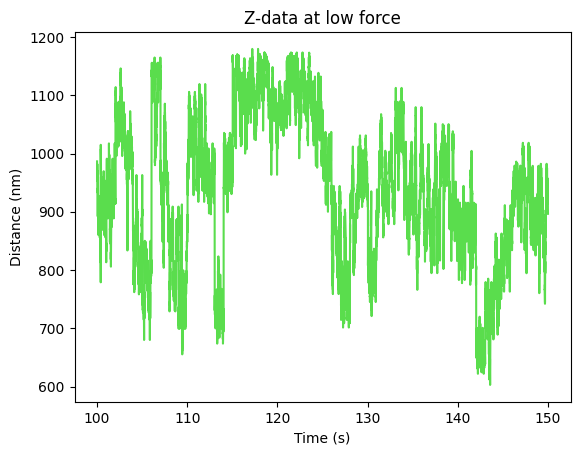

In [37]:
# ## High force
# fig1 = plt.plot(timeVector[highForceStart:highForceEnd], beadX[highForceStart:highForceEnd], color='#5ADD4D') 
# plt.title('Z-data at high force')
# plt.xlabel('Time (s)')
# plt.ylabel('Distance (nm)')

# the x axis has the lower variance so it is most likely the 

print('The high force x-variance is: ', np.var(beadX[highForceStart:highForceEnd]))
print('The high force y-variance is: ', np.var(beadY[highForceStart:highForceEnd]))
print('The high force z-variance is: ', np.var(beadZ[highForceStart:highForceEnd]))

## Low force
fig =  plt.plot(timeVector[lowForceStart:lowForceEnd],beadZ[lowForceStart:lowForceEnd], color = '#5ADD4D')
plt.title('Z-data at low force')
plt.xlabel('Time (s)')
plt.ylabel('Distance (nm)')

print('The low force x-variance is: ', np.var(beadX[lowForceStart:lowForceEnd]))
print('The low force y-variance is: ', np.var(beadY[lowForceStart:lowForceEnd]))
print('The low force z-variance is: ', np.var(beadZ[lowForceStart:lowForceEnd]))

The glass position is:  622.9849999999999


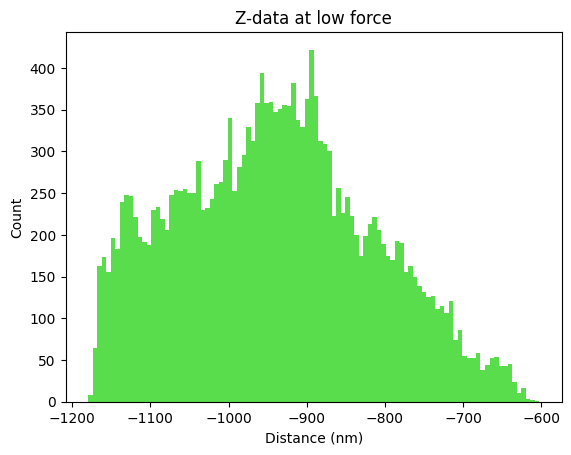

In [38]:
# Now we try and fiund the glass position
beadDiameter = 2800

plt.figure(1)
fig = plt.hist(-beadZ[lowForceStart:lowForceEnd], bins = 100, color='#5ADD4D')
plt.title('Z-data at low force')
plt.ylabel('Count')
plt.xlabel('Distance (nm)')

sortedZdata = np.sort(beadZ[lowForceStart:lowForceEnd])

glassPosition = np.mean(sortedZdata[0:30])
print('The glass position is: ', glassPosition)

tetherExtension = -beadZ + glassPosition + beadDiameter/2 - 860

Text(0.5, 0.01, 'Distance (nm)')

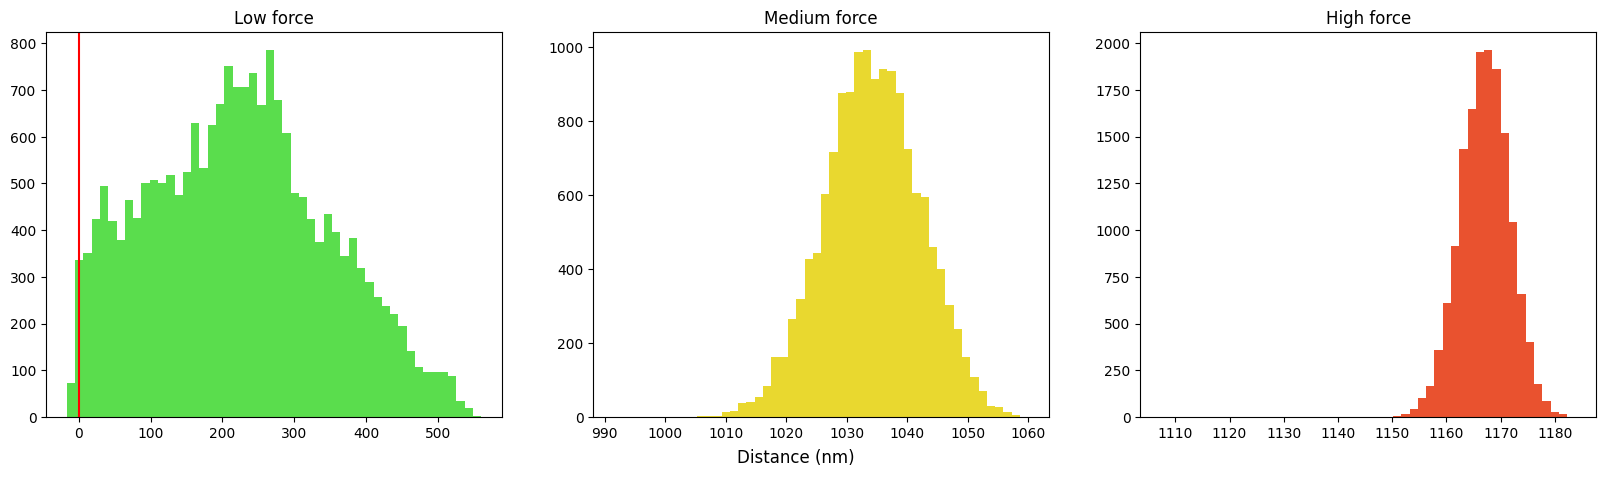

In [39]:
fig, ax = plt.subplots(1, 3, figsize = (20,5))
ax[0].hist(tetherExtension[lowForceStart:lowForceEnd], bins = 50, color='#5ADD4D')
ax[1].hist(tetherExtension[medForceStart:medForceEnd], bins = 50, color='#E9D82F')
ax[2].hist(tetherExtension[highForceStart:highForceEnd], bins = 50, color='#E9522F')
ax[0].set_title('Low force')
ax[1].set_title('Medium force')
ax[2].set_title('High force')
ax[0].axvline(x = 0, color = 'red')
fig.supxlabel('Distance (nm)')

In [40]:
concatDF

,inf,zMotor,rotmotor,xRefBead1,yRefBead1,zRefBead1,xRefBead2,yRefBead2,zRefBead2,xExpBead1,yExpBead1,zExpBead1,xExpBead2,yExpBead2,zExpBead2
0,inf,30.74996,20879.98225,1174.99023,673.69116,9.09452,1254.85400,1324.13354,9.07256,285.07056,979.56299,9.08505,419.79971,375.97461,9.07524
1,inf,30.74996,20879.98225,1175.24744,673.59235,9.08963,1254.83447,1324.11523,9.07339,285.05399,979.57349,9.08545,419.78729,375.98059,9.07356
2,inf,30.74996,20879.98225,1175.01587,673.63531,9.09536,1254.83752,1324.10376,9.07167,285.03802,979.55011,9.08574,419.78754,375.96533,9.07554
3,inf,30.74996,20879.98225,1175.31018,673.62152,9.08775,1254.84314,1324.10217,9.07319,285.05441,979.54578,9.08625,419.78320,375.97766,9.07452
4,inf,30.74996,20879.98225,1175.04858,673.71033,9.08577,1254.84985,1324.13123,9.07319,285.06674,979.56165,9.08539,419.79047,375.98389,9.07427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006066,inf,30.74996,20879.99175,1174.70154,683.12231,-1.38250,1185.67236,1318.60376,2.91654,284.97626,979.21521,8.78417,419.97021,375.88330,8.84803
1006067,inf,30.74996,20879.99175,1174.65222,683.02087,-0.44822,1185.67676,1318.60522,3.90840,284.97580,979.20929,8.78479,419.97971,375.87378,8.84903
1006068,inf,30.74996,20879.99175,1174.42053,683.36487,-0.28418,1185.69019,1318.55200,3.91252,284.99658,979.22913,8.78572,419.97388,375.89307,8.84773
1006069,inf,30.74996,20879.99175,1174.27478,683.58258,-0.45574,1185.71814,1318.61145,3.64772,284.99908,979.20801,8.78411,419.98145,375.90466,8.85039
